# **Предсказание выживаемости человека на титанике на основе его данных**
Использование статистического теста

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

**Импорт данных**

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

**Работа с данными**

In [3]:
df_train.groupby(['Survived', 'Pclass', 'Sex'], as_index=False).agg({'PassengerId': 'count'})

,Survived,Pclass,Sex,PassengerId
0,0,1,female,3
1,0,1,male,77
2,0,2,female,6
3,0,2,male,91
4,0,3,female,72
5,0,3,male,300
6,1,1,female,91
7,1,1,male,45
8,1,2,female,70
9,1,2,male,17


In [4]:
df_train.groupby(['Sex'], as_index=False).describe()

Sex PassengerId                                                      \
                count        mean         std  min     25%    50%     75%   
0  female       314.0  431.028662  256.846324  2.0  231.75  414.5  641.25   
1    male       577.0  454.147314  257.486139  1.0  222.00  464.0  680.00   

         Survived  ... Parch        Fare                              \
     max    count  ...   75%  max  count       mean        std   min   
0  889.0    314.0  ...   1.0  6.0  314.0  44.479818  57.997698  6.75   
1  891.0    577.0  ...   0.0  5.0  577.0  25.523893  43.138263  0.00   

                                     
         25%   50%    75%       max  
0  12.071875  23.0  55.00  512.3292  
1   7.895800  10.5  26.55  512.3292  

[2 rows x 57 columns]

In [5]:
df_train.groupby(['Embarked', 'Survived'], as_index=False).agg({'PassengerId': 'count'})

,Embarked,Survived,PassengerId
0,C,0,75
1,C,1,93
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,217


In [6]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.Age = df_train.Age.fillna(df_train.Age.median())
df_train.Cabin = df_train.Cabin.fillna(0)
df_train.Embarked = df_train.Embarked.fillna(0)

In [8]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
data_all =  pd.concat([df_train, df_test], ignore_index=True)

In [11]:
data_all = pd.get_dummies(data_all, columns=['Sex', 'Embarked'], drop_first= True)
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first= True)
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'], drop_first= True)
df_test['Embarked_C'] = False

data_all[['Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']] = data_all[['Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)
df_train[['Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']] = df_train[['Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)
df_test[['Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']] = df_test[['Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)

In [12]:
data_all.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [13]:
data_all

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,1,0,0,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,1,0,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,0,0,1
1307,1308,NaN,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,1,0,0,1


In [14]:
feat_test = data_all.columns.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin']).tolist()

In [15]:
feat_test

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

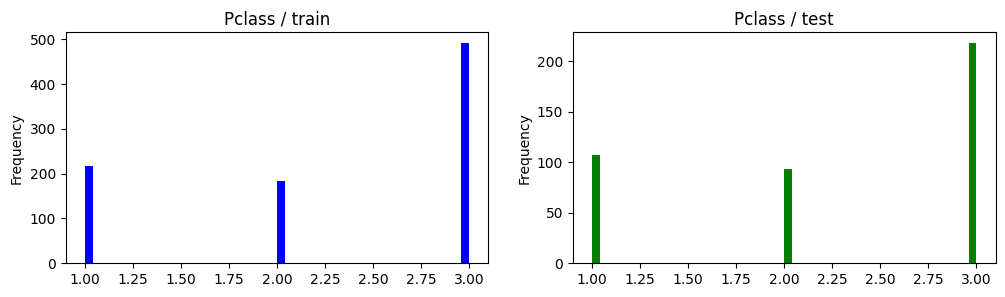

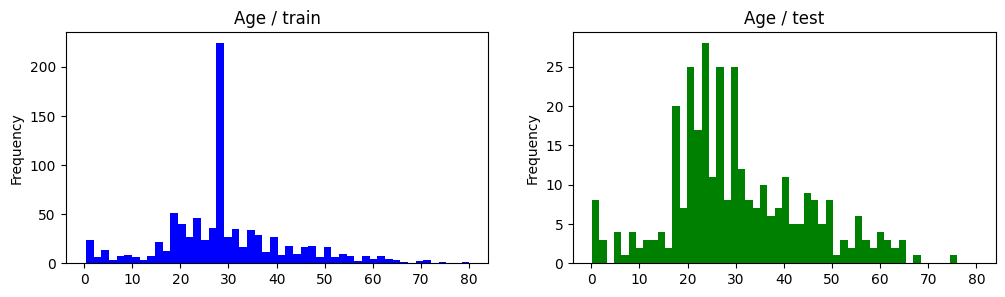

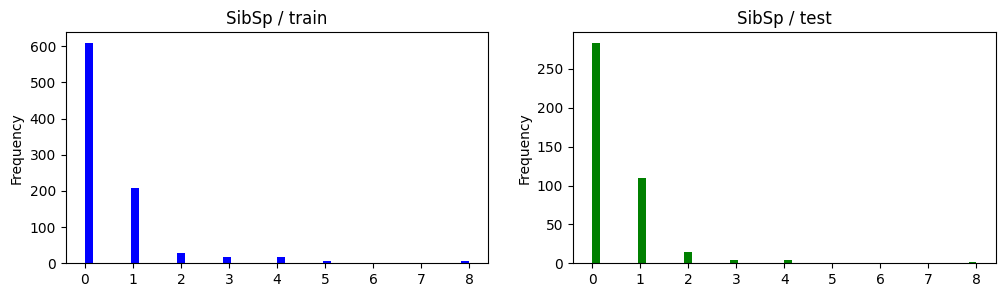

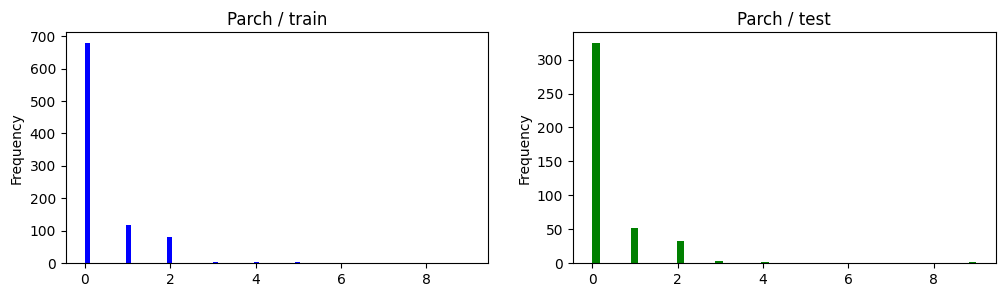

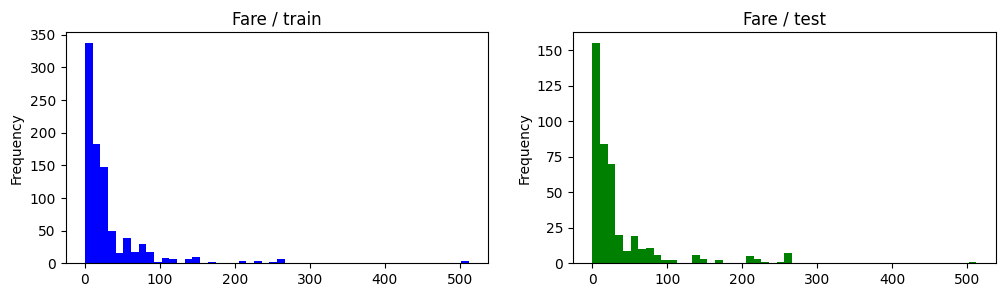

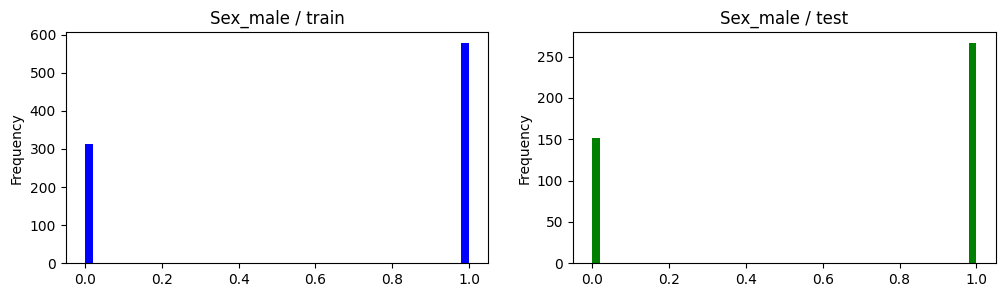

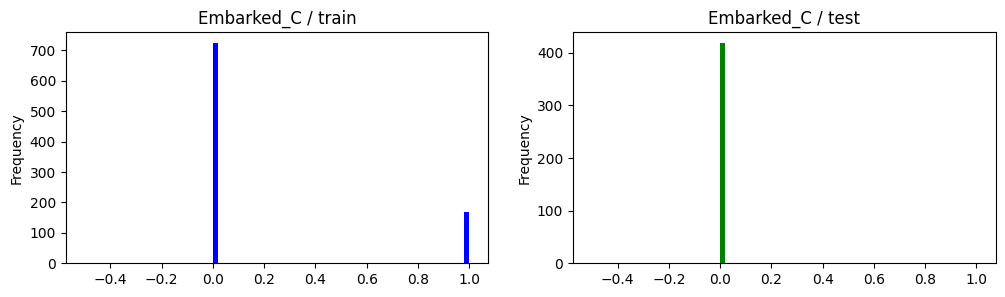

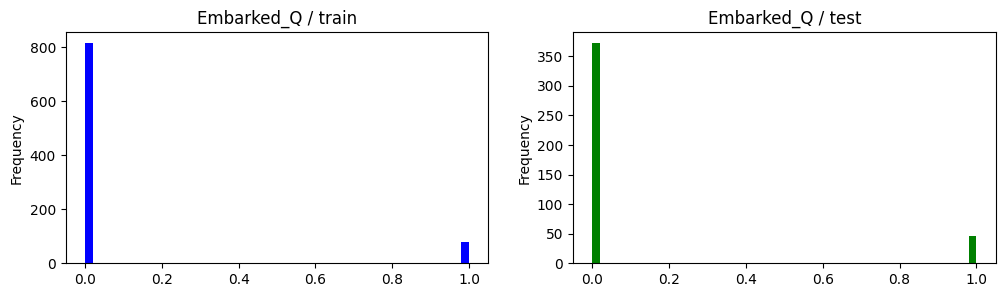

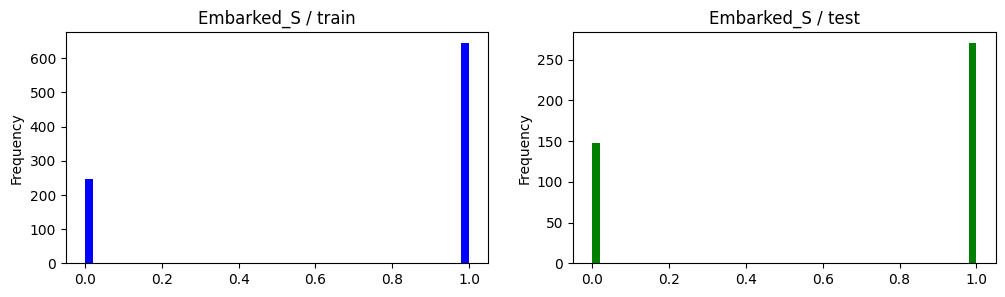

In [16]:
for feat in feat_test:
    plt.figure(figsize=(12,3))
    ax1 = plt.subplot(1,2,1)
    df_train[feat].plot(kind='hist', bins=50, color='blue')
    plt.title(feat + ' / train')
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    df_test[feat].plot(kind='hist', bins=50, color='green')
    plt.title(feat + ' / test')
    plt.show()

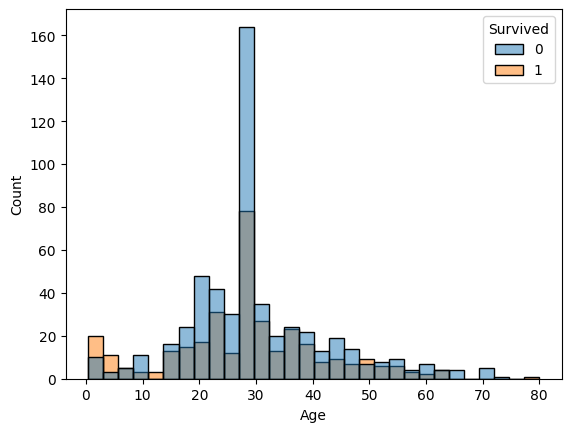

In [17]:
import seaborn as sns

sns.histplot(data=df_train, x="Age", hue = 'Survived')
None

**Предсказание на основе возраста, класса и пола пассажира**

In [18]:
predictions = {}
df = pd.read_csv('/kaggle/input/titanic/test.csv')
for passenger_index, passenger in df.iterrows():
    passenger_id = passenger['PassengerId']
    if (passenger['Age'] < 15 and  (passenger['Pclass'] == 1 or passenger['Pclass'] == 2)) or (passenger['Sex'] == 'female' and (passenger['Pclass'] == 1 or passenger['Pclass'] == 2)):
        predictions[passenger_id] = 1
    else:
        predictions[passenger_id] = 0
df = pd.DataFrame.from_dict(predictions, orient='index').reset_index()

In [19]:
df_test = df.rename(columns={'index': 'PassengerId'})
df_test = df.rename(columns={0: 'Survived',})

In [20]:
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [21]:
output = pd.DataFrame({'PassengerId': sub.PassengerId, 'Survived': df_test.Survived})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [22]:
output.to_csv('submission.csv', index=False)